<a href="https://colab.research.google.com/github/anakinZhe/Interview-Exercises/blob/main/OliverExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Data.csv', parse_dates=['order_creation_date','actual_delivery_time'])
df['month'] = df['actual_delivery_time'].dt.strftime('%Y-%m')
df['monthly_payment'] = df['monthly_payment'].str.replace('$', '').str.replace(',', '').astype('float')
df['Order Value'] = df['Order Value'].str.replace('$', '').str.replace(',', '').astype('float')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


,subscription_ID,order_creation_date,actual_delivery_time,monthly_payment,term,Order Value,month
0,e65fa29f-7fe6-495d-a4eb-8cf9dd40953d,2019-09-01 22:40:00,2019-09-06,30.0,12,360.0,2019-09
1,627eb7f4-8c8c-46a9-9429-ea2781e2dacd,2019-09-01 22:52:00,2019-09-05,62.0,3,186.0,2019-09
2,55d19f62-2fff-457f-a2ae-c347d94501c9,2019-09-02 01:52:00,2019-09-07,70.0,8,560.0,2019-09
3,24410eb3-f14e-40d2-ae45-2cf7682b8869,2019-09-02 20:17:00,2019-09-07,15.0,12,180.0,2019-09
4,fc2df473-2330-4bad-b7d6-d3dc082bc3ee,2019-09-03 17:05:00,2019-09-06,15.0,12,180.0,2019-09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   subscription_ID       502 non-null    object        
 1   order_creation_date   502 non-null    datetime64[ns]
 2   actual_delivery_time  466 non-null    datetime64[ns]
 3   monthly_payment       502 non-null    float64       
 4   term                  502 non-null    int64         
 5   Order Value           502 non-null    float64       
 6   month                 466 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 27.6+ KB


In [ ]:
len(df.subscription_ID.unique())

502

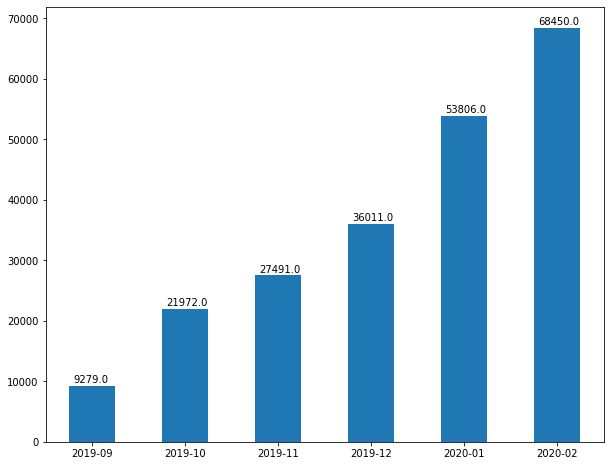

In [ ]:
# monthly revenue
df['sub_end_time'] = df['actual_delivery_time']
for i in range(df.shape[0]):
  df.loc[i,'sub_end_time'] = df.loc[i, 'sub_end_time'] + pd.DateOffset(months = df.loc[i, 'term'])

revenue_d = {}
month_l = ['2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01']
for i in range(len(month_l) - 1):
  condition = (df['actual_delivery_time'] < month_l[i+1]) & (df['sub_end_time'] >= month_l[i+1])
  revenue_d[month_l[i][:7]] = {'revenue' : df[condition]['monthly_payment'].sum(),
                               'active_sub' : df[condition]['monthly_payment'].shape[0]}

revenue_df = pd.DataFrame.from_dict(revenue_d,  orient='index')
revenue_df['revenue'].plot.bar(figsize = (10,8))
plt.xticks(rotation=0)
for i, v in enumerate(revenue_df.iloc[:,0]):
    plt.text( i - 0.2 , v + 500 , str(v),
            color = 'black')

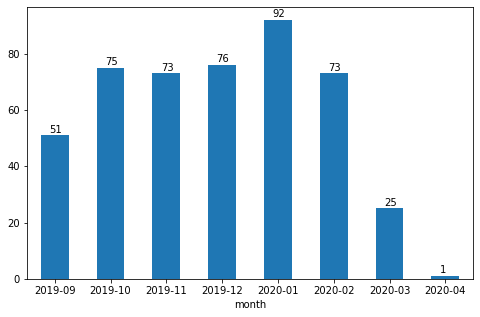

In [ ]:
# orders that become active each month
a = df['term'].groupby(df['month']).count()
a.plot.bar(figsize = (8,5))
plt.xticks(rotation=0)
for i, v in enumerate(a):
    plt.text( i - 0.1 , v + 1 , str(v),
            color = 'black')

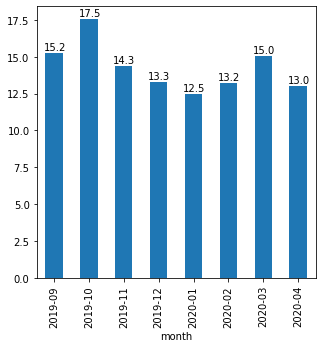

In [ ]:
# average term
a = df['term'].groupby(df['month']).mean()
a.plot.bar(figsize=(5,5))
for i, v in enumerate(a):
    plt.text( i - 0.3 , v + .2 , str(round(v,1)),
            color = 'black')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

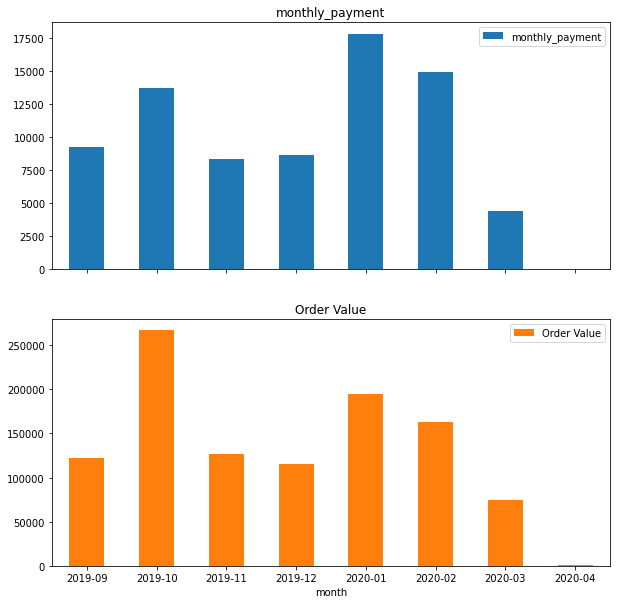

In [ ]:
a = df.groupby('month').sum()[['monthly_payment','Order Value']]
a.plot.bar(figsize = (10,10), subplots=True )
plt.xticks(rotation=0)

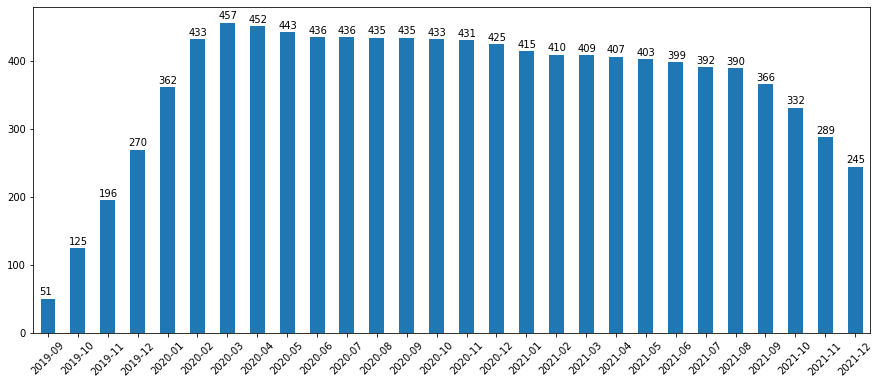

In [ ]:
# monthly revenue with renewal
df['sub_end_time_re'] = df['actual_delivery_time']
for i in range(df.shape[0]):
  if df.loc[i, 'term'] < 6:
    df.loc[i,'sub_end_time_re'] = df.loc[i, 'sub_end_time_re'] + pd.DateOffset(months = df.loc[i, 'term'])
  else:
    df.loc[i,'sub_end_time_re'] = df.loc[i, 'sub_end_time_re'] + pd.DateOffset(months = df.loc[i, 'term'] * 2)

revenue_re_d = {}
month_l = ['2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
           '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
           '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
           '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
           '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
           '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
           '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01']
for i in range(len(month_l) - 1):
  condition = (df['actual_delivery_time'] < month_l[i+1]) & (df['sub_end_time_re'] >= month_l[i+1])
  revenue_re_d[month_l[i][:7]] = {'revenue' : df[condition]['monthly_payment'].sum(),
                               'active_sub' : df[condition]['monthly_payment'].shape[0]}

revenue_re_df = pd.DataFrame.from_dict(revenue_re_d,  orient='index')
revenue_re_df['active_sub'].plot.bar(figsize = (15,6))
plt.xticks(rotation=45)
for i, v in enumerate(revenue_re_df.iloc[:,1]):
    plt.text( i - 0.3 , v + 5 , str(v),
            color = 'black')